In [1]:
import json
import pandas

json_data = json.load(open("data/mmum.json"))
malts = pandas.json_normalize(json_data, "malts", ["style"], record_prefix="malt_")

In [2]:
# Pick a style
style_malts = malts[malts["style"] == "Pale Ale"]
# style_malts["malt_kind"].value_counts()[:10]

malt_ratio = style_malts.groupby("malt_kind")['malt_amount_percent'].agg(['min', 'max', 'mean', 'count'])
malt_ratio = malt_ratio[malt_ratio['count'] > 3] # Filter low amount of data points
malt_ratio.sort_values(by='count', ascending=0).head(10)

,min,max,mean,count
malt_kind,,,,
pilsner,4.901961,96.629213,57.449750,71
pale ale,14.410828,100.000000,66.059918,65
carahell,1.818182,20.000000,7.256714,36
wiener,7.142857,100.000000,39.960408,35
münchner,0.924855,88.000000,19.081258,33
carapils,1.607717,25.925926,7.245270,21
weizen hell,6.382979,50.092764,18.201397,15
sauer,0.892857,9.090909,2.955332,15
weizen,4.166667,15.000000,8.421388,14


In [3]:
top_malts = style_malts["malt_kind"].value_counts()[:10].index.values
style_top_malts = style_malts[style_malts['malt_kind'].isin(top_malts)] # Get only the values of the mostly used malts
# style_top_malts.loc[:, ["malt_kind", "malt_amount_percent"]]

<AxesSubplot:title={'center':'malt_amount_percent'}, xlabel='malt_kind'>

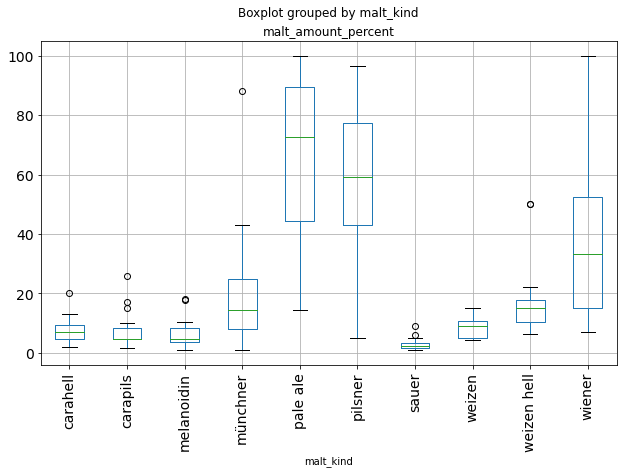

In [4]:
style_top_malts.boxplot(by="malt_kind", column=["malt_amount_percent"], rot=90, fontsize=14, figsize=[10, 6])